<a href="https://colab.research.google.com/github/Amarmurun0212/Diver/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from cProfile import label
from traceback import format_tb
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [9]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装 - Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      イテレーション数 - Number of iterations
    lr : float
      学習率 - Learning rate
    no_bias : bool
      バイアス項を入れない場合はTrue - True if no bias term is included
    verbose : bool
      学習過程を出力する場合はTrue - True to output the learning process
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,) - ndarray, shape (n_features,) of the following form
        パラメータ Parameters
    self.loss : 次の形のndarray, shape (self.iter,) - ndarray of the following form, shape (self.iter,)
      訓練データに対する損失の記録 - Recording losses for training data
    self.val_loss : 次の形のndarray, shape (self.iter,) - ndarray, shape (self.iter,) of the following form
      検証データに対する損失の記録 - Recording losses for validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録 - Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.theta = None 
        # 損失を記録する配列を用意 - Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        #self.theta = np.
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量 - Features of training data
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値 - Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量 - Features of verification data
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値 - Correct value of verification data
        """
        if self.no_bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            if X_val is not None:
                bias = np.ones((X_val.shape[0], 1))
                X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.iter):
            pred = self._linear_hypothesis(X)
            self._gradient_descent(X, y)
            #print('in the linear hyp theta:{}'.format(self.theta))
            loss = self._loss_func(pred, y)
            #print('loss:{}'.format(loss))
            self.loss = np.append(self.loss, loss)         
            if X_val is not None:
                pred_val = self._linear_hypothesis(X_val)
                loss_val = self._loss_func(pred_val, y_val)
                self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('The loss of the {} learning:{}'.format(i,loss))
        
    def predict(self, X):
        """
        線形回帰を使い推定する。 Estimate using linear regression.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル sample
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果 Estimated result by linear regression
        """
        if self.no_bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する - Compute a linear hypothetical function

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ - Training data

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果 - Estimated result by linear hypothetical function

        """
        
        pred = np.dot(X,self.theta)
        return pred

    def _gradient_descent(self, X, y):
        """
        Perform gradient descent for n iteration, which involves making a prediction, computing the gradients and updating the weight and biases

        Parameters
        ----------------------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ - Training data

        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値 - Correct answer value of training data

        Returns
        ----------------------

        """
        m = X.shape[0]
        n = X.shape[1]
        pred = self._linear_hypothesis(X)
        gradient = X.T @ (pred - y)
        self.theta = self.theta - (self.lr/m) * gradient
  

        
    def _MSE(self, y_pred, y):
        """
        平均二乗誤差の計算 Calculation of mean square error

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
        推定した値 - Estimated value
        y : 次の形のndarray, shape (n_samples,)
        正解値 - Correct answer value

        Returns
        ----------
        mse : numpy.float
        平均二乗誤差 Mean squared error
        """
        mse = ((y_pred - y) ** 2).sum() / y.shape[0]
        return mse
    
    def _loss_func(self,y_pred, y):
        loss = self._MSE(y_pred, y)/2
        return loss


In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X = train.loc[:, ['GrLivArea', 'YearBuilt']]
y = train.loc[:, ['SalePrice']]
X = X.values
y = y.values

[Question 6] Learning and Estimation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=123)
print(X_train)
print(y_train)

[[1728 1976]
 [1176 1934]
 [1509 1988]
 [1632 1998]
 [ 630 1972]
 [ 864 1972]
 [1137 1987]
 [2117 1970]
 [1845 1992]
 [1048 1922]
 [ 816 1930]
 [ 864 1950]
 [1924 1998]
 [3447 1935]
 [2291 1999]
 [1367 1900]
 [1742 1985]
 [1343 1921]
 [1588 1959]
 [1256 1965]
 [1344 1958]
 [1947 2004]
 [1056 1955]
 [1680 1976]
 [1052 1968]
 [ 999 1962]
 [ 875 1931]
 [ 784 1924]
 [1800 1961]
 [1477 1928]
 [ 987 1973]
 [1221 2004]
 [1473 1968]
 [1919 2006]
 [1097 1984]
 [ 990 1995]
 [1762 1920]
 [1074 1975]
 [1691 1924]
 [1225 1959]
 [1876 1974]
 [ 864 1970]
 [1322 1974]
 [1368 1910]
 [2340 1941]
 [1152 1955]
 [1908 2002]
 [1786 2001]
 [1533 1975]
 [1694 1925]
 [1224 1962]
 [3194 1934]
 [1344 1997]
 [1724 1967]
 [1775 1993]
 [1412 2006]
 [1792 2000]
 [1430 2000]
 [2392 2003]
 [1440 1977]
 [1086 1954]
 [1656 2006]
 [ 796 1910]
 [2259 1953]
 [1588 1999]
 [1141 2005]
 [1564 1941]
 [1047 1885]
 [1632 1966]
 [ 960 1956]
 [2156 1968]
 [ 768 1972]
 [1218 1941]]
[[150900]
 [114500]
 [175000]
 [176500]
 [ 81000]


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=False)
slr.fit(X_train, y_train, X_test, y_test)
pred = slr.predict(X_test)
#print("Prediction using ScrathLinearRegression:{}".format(pred))
score = mean_squared_error(y_test, pred)
print("MSE of ScratchLinearRegression:{}".format(score))


reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)
#print("Prediction using LinearRegression from sklearn:{}".format(pred))
score = mean_squared_error(y_test, pred)
print("MSE of sklearn Linear Regression:{}".format(score))

MSE of ScratchLinearRegression:2572760845.6516953
MSE of sklearn Linear Regression:2572703997.682861


[Question 7] Learning curve plot

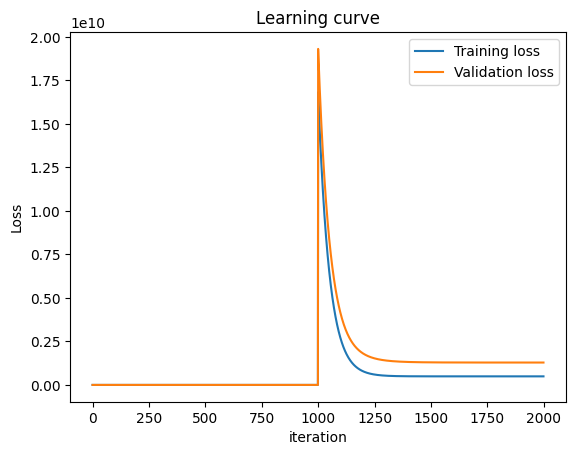

In [14]:
plt.plot(slr.loss, label = 'Training loss')
plt.plot(slr.val_loss, label = 'Validation loss')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.show()

[Problem 8] (Advanced Exercise) Removal of Bias Term

In [15]:
slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)
slr.fit(X_train, y_train, X_test, y_test)
pred = slr.predict(X_test)
print("Prediction using ScrathLinearRegression:{}".format(pred))

Prediction using ScrathLinearRegression:[[ 67666.31008183]
 [-13744.22662028]
 [ 36773.64176702]
 ...
 [-59887.62739426]
 [-26118.95062614]
 [ 98533.65954679]]


[Problem 9] (Advanced problem) Multi-dimensional feature quantity

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2)

X = train.loc[:, ['GrLivArea', 'YearBuilt']]
y = train.loc[:, ['SalePrice']]

poly_transformer.fit(X)
X = poly_transformer.transform(X)
print('Polynomial Features shape: ', X.shape)

#X = X.values
y = y.values


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=False)
slr.fit(X_train, y_train, X_test, y_test)
pred = slr.predict(X_test)
#print("Prediction using ScrathLinearRegression with polinominal feature:{}".format(pred))
score = mean_squared_error(y_test, pred)
print("MSE of ScratchLinearRegression with polynominal feauters:{}".format(score))
print('When using polynominal feature the root mean square error is reduced')

Polynomial Features shape:  (1460, 6)
MSE of ScratchLinearRegression with polynominal feauters:2638095753.7891254
When using polynominal feature the root mean square error is reduced
